An Airbnb datasets available under a Creative Common license. 

Datasets can be downloaded from https://insideairbnb.com/get-the-data/

We are using "Taipei, Northern Taiwan, Taiwan 30 June, 2024" dataset.

* Country/City	File Name	Description
* Taipei	[listings.csv.gz](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/data/listings.csv.gz)	Detailed Listings data
* Taipei	[calendar.csv.gz](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/data/calendar.csv.gz)	Detailed Calendar Data
* Taipei	[reviews.csv.gz](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/data/reviews.csv.gz)	Detailed Review Data
* Taipei	[listings.csv](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/visualisations/listings.csv)	Summary information and metrics for listings in Taipei (good for visualisations).
* Taipei	[reviews.csv](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/visualisations/reviews.csv)	Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
* Taipei	[neighbourhoods.csv](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/visualisations/neighbourhoods.csv)	Neighbourhood list for geo filter. Sourced from city or open source GIS files.
* Taipei	[neighbourhoods.geojson](https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/visualisations/neighbourhoods.geojson)	GeoJSON file of neighbourhoods of the city.


In [1]:
import gzip
import urllib.request
from pathlib import Path
base_url = 'https://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2024-06-30/data/'
data_root = Path('airbnb_data')
data_root.mkdir(exist_ok=True)
for filename in ['listings.csv.gz', 'calendar.csv.gz', 'reviews.csv.gz']:    
    # download the file and extract with gzip if necessary and save it to the airbnb_data folder
    print(f'Downloading {filename}...')
    url = f'{base_url}{filename}'
    with urllib.request.urlopen(url) as response:
        in_file = gzip.open(response) if filename.endswith('.gz') else response
        out_filename = filename[:-3] if filename.endswith('.gz') else filename
        with open(data_root/out_filename, 'wb') as out_file:
            out_file.write(in_file.read())

list(data_root.iterdir())


[WindowsPath('airbnb_data/calendar.csv'),
 WindowsPath('airbnb_data/listings.csv'),
 WindowsPath('airbnb_data/reviews.csv')]

In [2]:
import pandas as pd
listings = pd.read_csv(data_root / 'listings.csv')
listings.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1152489199286926244,https://www.airbnb.com/rooms/1152489199286926244,20240630141308,2024-06-30,previous scrape,中華路西門町商圈優質房源,Stay in this centrally located place for easy ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,74339328,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
1,983231432200751416,https://www.airbnb.com/rooms/983231432200751416,20240630141308,2024-06-30,city scrape,Cozy Room D @ Linguang MRT 2 mins,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,471945582,...,NaN,NaN,NaN,NaN,t,45,3,42,0,NaN
2,904948491486302171,https://www.airbnb.com/rooms/904948491486302171,20240630141308,2024-06-30,previous scrape,短期月租/台大醫院/西門/北車,It is very convenient to stay here in the cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,19216347,...,NaN,NaN,NaN,NaN,f,35,34,1,0,NaN
3,996828202033196618,https://www.airbnb.com/rooms/996828202033196618,20240630141308,2024-06-30,city scrape,西門町精緻雙人房 Ximending Double Room,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,122764186,...,4.96,4.93,4.75,NaN,f,98,97,1,0,3.31
4,52928274,https://www.airbnb.com/rooms/52928274,20240630141308,2024-06-30,city scrape,Good area電梯二樓，2nd floor single suite with elev...,"Facing the park, the environment is good, and ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,428197800,...,NaN,NaN,NaN,NaN,f,4,3,1,0,NaN
5,1052082377217952767,https://www.airbnb.com/rooms/1052082377217952767,20240630141308,2024-06-30,city scrape,Gorgeous CBD Loft Three Rooms#忠孝敦化,"- The number of people is different, the charg...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,491437310,...,4.85,4.92,4.77,NaN,f,6,6,0,0,2.05
6,1052381500287623162,https://www.airbnb.com/rooms/1052381500287623162,20240630141308,2024-06-30,city scrape,返璞歸真 單純自在,Convenient place to stay in a central location...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,7836466,...,5.00,5.00,5.00,NaN,f,3,1,2,0,0.74
7,1013482100151360829,https://www.airbnb.com/rooms/1013482100151360829,20240630141308,2024-06-30,city scrape,【小南門】僅供月租/ 四房2衛 / 電梯 8~16ppl,* * Solo floor mattresses If you need to make ...,NaN,https://a0.muscache.com/pictures/2e962d12-6c56...,330579461,...,5.00,5.00,5.00,NaN,f,34,34,0,0,0.59
8,996035053127333230,https://www.airbnb.com/rooms/996035053127333230,20240630141308,2024-06-30,city scrape,好好聊天（台北）,This unique place is conveniently located so y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,459871897,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9,1161471740345344281,https://www.airbnb.com/rooms/1161471740345344281,20240630141308,2024-06-30,city scrape,A201 獨立房源 2間房間 靠近台北車站 熱鬧的地點 安靜的房間,You're welcome to review the highlights below<...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,578800230,...,NaN,NaN,NaN,NaN,f,11,8,3,0,NaN


In [3]:
listings.shape

(5610, 75)

In [4]:
from rich import print
# show dtypes of each column, because there are too many columns, by default pandas will not show all columns
print(listings.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [5]:
# there are many ways to workaroud this, one is to use pd.set_option to change the display settings
#pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_rows', 100)
#print(listings.dtypes)
# yet another way is to convert the output to be a dict
print(listings.dtypes.to_dict())

{
    'id': dtype('int64'),
    'listing_url': dtype('O'),
    'scrape_id': dtype('int64'),
    'last_scraped': dtype('O'),
    'source': dtype('O'),
    'name': dtype('O'),
    'description': dtype('O'),
    'neighborhood_overview': dtype('O'),
    'picture_url': dtype('O'),
    'host_id': dtype('int64'),
    'host_url': dtype('O'),
    'host_name': dtype('O'),
    'host_since': dtype('O'),
    'host_location': dtype('O'),
    'host_about': dtype('O'),
    'host_response_time': dtype('O'),
    'host_response_rate': dtype('O'),
    'host_acceptance_rate': dtype('O'),
    'host_is_superhost': dtype('O'),
    'host_thumbnail_url': dtype('O'),
    'host_picture_url': dtype('O'),
    'host_neighbourhood': dtype('O'),
    'host_listings_count': dtype('int64'),
    'host_total_listings_count': dtype('int64'),
    'host_verifications': dtype('O'),
    'host_has_profile_pic': dtype('O'),
    'host_identity_verified': dtype('O'),
    'neighbourhood': dtype('O'),
    'neighbourhood_cleansed': dtype('O'),
    'neighbourhood_group_cleansed': dtype('float64'),
    'latitude': dtype('float64'),
    'longitude': dtype('float64'),
    'property_type': dtype('O'),
    'room_type': dtype('O'),
    'accommodates': dtype('int64'),
    'bathrooms': dtype('float64'),
    'bathrooms_text': dtype('O'),
    'bedrooms': dtype('float64'),
    'beds': dtype('float64'),
    'amenities': dtype('O'),
    'price': dtype('O'),
    'minimum_nights': dtype('int64'),
    'maximum_nights': dtype('int64'),
    'minimum_minimum_nights': dtype('int64'),
    'maximum_minimum_nights': dtype('int64'),
    'minimum_maximum_nights': dtype('int64'),
    'maximum_maximum_nights': dtype('int64'),
    'minimum_nights_avg_ntm': dtype('float64'),
    'maximum_nights_avg_ntm': dtype('float64'),
    'calendar_updated': dtype('float64'),
    'has_availability': dtype('O'),
    'availability_30': dtype('int64'),
    'availability_60': dtype('int64'),
    'availability_90': dtype('int64'),
    'availability_365': dtype('int64'),
    'calendar_last_scraped': dtype('O'),
    'number_of_reviews': dtype('int64'),
    'number_of_reviews_ltm': dtype('int64'),
    'number_of_reviews_l30d': dtype('int64'),
    'first_review': dtype('O'),
    'last_review': dtype('O'),
    'review_scores_rating': dtype('float64'),
    'review_scores_accuracy': dtype('float64'),
    'review_scores_cleanliness': dtype('float64'),
    'review_scores_checkin': dtype('float64'),
    'review_scores_communication': dtype('float64'),
    'review_scores_location': dtype('float64'),
    'review_scores_value': dtype('float64'),
    'license': dtype('float64'),
    'instant_bookable': dtype('O'),
    'calculated_host_listings_count': dtype('int64'),
    'calculated_host_listings_count_entire_homes': dtype('int64'),
    'calculated_host_listings_count_private_rooms': dtype('int64'),
    'calculated_host_listings_count_shared_rooms': dtype('int64'),
    'reviews_per_month': dtype('float64')
}

In [6]:
# another way is using data viewer to view the dataframe, for example, in vscode, you can use data wrangler extension
# if you have the extension installed, you should see a button to view the dataframe in Data Wrangler
# or press the View data button at the top toolbar
listings_dtype = listings.dtypes
listings_dtype

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [7]:
# string columns are of type object, we can convert them to string type if we want, e,g,
# string_columns = listings.select_dtypes(include='object').columns
# listings[string_columns] = listings[string_columns].astype('string')
# but usually object type is good enough.
# Other frameworks like polars will automatically convert object type to string type by default
import polars as pl
print(pl.read_csv(data_root / 'listings.csv').dtypes[:10])

[Int64, String, Int64, String, String, String, String, String, String, Int64]

In [8]:
# another import information you want to know is the shape of the dataframe
print(listings.shape)

(5610, 75)

In [9]:
# let's load calendar.csv and reviews.csv
calendar = pd.read_csv(data_root / 'calendar.csv')
reviews = pd.read_csv(data_root / 'reviews.csv')
# let's check the shape of the dataframes
print("calandar shape: ", calendar.shape)
print(calendar.dtypes.to_dict())
print("reviews shape: ", reviews.shape)
print(reviews.dtypes.to_dict())

calandar shape: 
(2047650, 7)

{
    'listing_id': dtype('int64'),
    'date': dtype('O'),
    'available': dtype('O'),
    'price': dtype('O'),
    'adjusted_price': dtype('float64'),
    'minimum_nights': dtype('int64'),
    'maximum_nights': dtype('int64')
}

reviews shape: 
(176522, 6)

{
    'listing_id': dtype('int64'),
    'id': dtype('int64'),
    'date': dtype('O'),
    'reviewer_id': dtype('int64'),
    'reviewer_name': dtype('O'),
    'comments': dtype('O')
}

In [10]:
print(listings.dtypes.to_dict())

{
    'id': dtype('int64'),
    'listing_url': dtype('O'),
    'scrape_id': dtype('int64'),
    'last_scraped': dtype('O'),
    'source': dtype('O'),
    'name': dtype('O'),
    'description': dtype('O'),
    'neighborhood_overview': dtype('O'),
    'picture_url': dtype('O'),
    'host_id': dtype('int64'),
    'host_url': dtype('O'),
    'host_name': dtype('O'),
    'host_since': dtype('O'),
    'host_location': dtype('O'),
    'host_about': dtype('O'),
    'host_response_time': dtype('O'),
    'host_response_rate': dtype('O'),
    'host_acceptance_rate': dtype('O'),
    'host_is_superhost': dtype('O'),
    'host_thumbnail_url': dtype('O'),
    'host_picture_url': dtype('O'),
    'host_neighbourhood': dtype('O'),
    'host_listings_count': dtype('int64'),
    'host_total_listings_count': dtype('int64'),
    'host_verifications': dtype('O'),
    'host_has_profile_pic': dtype('O'),
    'host_identity_verified': dtype('O'),
    'neighbourhood': dtype('O'),
    'neighbourhood_cleansed': dtype('O'),
    'neighbourhood_group_cleansed': dtype('float64'),
    'latitude': dtype('float64'),
    'longitude': dtype('float64'),
    'property_type': dtype('O'),
    'room_type': dtype('O'),
    'accommodates': dtype('int64'),
    'bathrooms': dtype('float64'),
    'bathrooms_text': dtype('O'),
    'bedrooms': dtype('float64'),
    'beds': dtype('float64'),
    'amenities': dtype('O'),
    'price': dtype('O'),
    'minimum_nights': dtype('int64'),
    'maximum_nights': dtype('int64'),
    'minimum_minimum_nights': dtype('int64'),
    'maximum_minimum_nights': dtype('int64'),
    'minimum_maximum_nights': dtype('int64'),
    'maximum_maximum_nights': dtype('int64'),
    'minimum_nights_avg_ntm': dtype('float64'),
    'maximum_nights_avg_ntm': dtype('float64'),
    'calendar_updated': dtype('float64'),
    'has_availability': dtype('O'),
    'availability_30': dtype('int64'),
    'availability_60': dtype('int64'),
    'availability_90': dtype('int64'),
    'availability_365': dtype('int64'),
    'calendar_last_scraped': dtype('O'),
    'number_of_reviews': dtype('int64'),
    'number_of_reviews_ltm': dtype('int64'),
    'number_of_reviews_l30d': dtype('int64'),
    'first_review': dtype('O'),
    'last_review': dtype('O'),
    'review_scores_rating': dtype('float64'),
    'review_scores_accuracy': dtype('float64'),
    'review_scores_cleanliness': dtype('float64'),
    'review_scores_checkin': dtype('float64'),
    'review_scores_communication': dtype('float64'),
    'review_scores_location': dtype('float64'),
    'review_scores_value': dtype('float64'),
    'license': dtype('float64'),
    'instant_bookable': dtype('O'),
    'calculated_host_listings_count': dtype('int64'),
    'calculated_host_listings_count_entire_homes': dtype('int64'),
    'calculated_host_listings_count_private_rooms': dtype('int64'),
    'calculated_host_listings_count_shared_rooms': dtype('int64'),
    'reviews_per_month': dtype('float64')
}

OK, we have done the first step. Now what? What should we do with these dataframes?

The next thing we are going to do is to ask question, to extract knowledge and information from these dataframes.

Here is a small list of the questions we can ask:
* Are there any suprise in the data? e.g. 
    * infinite or missing data. 
    * unusual values(too large, too small, undecoded text, wrong dtype)
    * unexpected duplicated rows.
    * this is called `data cleaning`
* Basic statistics
    * mean, std, medium, etc.
    * How many different values?
    * Value counts.
* Are there columns that has same sematics? e.g. `listing_id` in `calendar` and `reviews` seem to refer to `id` column in `listings`
    * are there any `listing_id` not in `listings.id`?
* Are there any relations between columns?

In [11]:

# list a view of the first few rows of the dataframe
for k in ['listing_url', 'scrape_id', 'source', 'last_scraped']:
    if k in listings.columns:
        del listings[k]
listings.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1152489199286926244,中華路西門町商圈優質房源,Stay in this centrally located place for easy ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,74339328,https://www.airbnb.com/users/show/74339328,Lynn,2016-05-27,"Taipei, Taiwan",...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
1,983231432200751416,Cozy Room D @ Linguang MRT 2 mins,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,471945582,https://www.airbnb.com/users/show/471945582,House,2022-07-27,NaN,...,NaN,NaN,NaN,NaN,t,45,3,42,0,NaN
2,904948491486302171,短期月租/台大醫院/西門/北車,It is very convenient to stay here in the cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,19216347,https://www.airbnb.com/users/show/19216347,心誠,2014-07-31,Taiwan,...,NaN,NaN,NaN,NaN,f,35,34,1,0,NaN
3,996828202033196618,西門町精緻雙人房 Ximending Double Room,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,122764186,https://www.airbnb.com/users/show/122764186,Kyo,2017-03-26,"Taipei City, Taiwan",...,4.96,4.93,4.75,NaN,f,98,97,1,0,3.31
4,52928274,Good area電梯二樓，2nd floor single suite with elev...,"Facing the park, the environment is good, and ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,428197800,https://www.airbnb.com/users/show/428197800,Shihyao,2021-10-20,NaN,...,NaN,NaN,NaN,NaN,f,4,3,1,0,NaN


In [12]:
# remove some columns that are not useful
for k in ['listing_url', 'scrape_id', 'source', 'last_scraped', 'picture_url']:
    if k in listings.columns:
        del listings[k]
listings.head()

,id,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1152489199286926244,中華路西門町商圈優質房源,Stay in this centrally located place for easy ...,NaN,74339328,https://www.airbnb.com/users/show/74339328,Lynn,2016-05-27,"Taipei, Taiwan",嗨，大家好,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
1,983231432200751416,Cozy Room D @ Linguang MRT 2 mins,Keep it simple at this peaceful and centrally-...,NaN,471945582,https://www.airbnb.com/users/show/471945582,House,2022-07-27,NaN,NaN,...,NaN,NaN,NaN,NaN,t,45,3,42,0,NaN
2,904948491486302171,短期月租/台大醫院/西門/北車,It is very convenient to stay here in the cent...,NaN,19216347,https://www.airbnb.com/users/show/19216347,心誠,2014-07-31,Taiwan,"我們做台北短期”月租”月租”唷,若是不滿30天 請勿在此下訂｡謝謝你們的配合｡\nWe on...",...,NaN,NaN,NaN,NaN,f,35,34,1,0,NaN
3,996828202033196618,西門町精緻雙人房 Ximending Double Room,Take it easy at this unique and tranquil getaway.,NaN,122764186,https://www.airbnb.com/users/show/122764186,Kyo,2017-03-26,"Taipei City, Taiwan",回到家，生活就該像在度假\n去度假，我們也讓您像在家\n為您提供像家一般舒適、自在的房間\n...,...,4.96,4.93,4.75,NaN,f,98,97,1,0,3.31
4,52928274,Good area電梯二樓，2nd floor single suite with elev...,"Facing the park, the environment is good, and ...",NaN,428197800,https://www.airbnb.com/users/show/428197800,Shihyao,2021-10-20,NaN,NaN,...,NaN,NaN,NaN,NaN,f,4,3,1,0,NaN


In [13]:
# fancy indexing, show only interesting columns
listings[['host_id', 'host_name']]

,host_id,host_name
0,74339328,Lynn
1,471945582,House
2,19216347,心誠
3,122764186,Kyo
4,428197800,Shihyao
...,...,...
5605,166929879,Cynthia
5606,580319608,Sandy
5607,28103867,Henry
5608,36408621,小多


In [14]:
# use loc to select rows and columns
listings.loc[100:110, ['host_id', 'host_name']]

,host_id,host_name
100,21301096,Sung
101,136010110,Rex
102,15588671,York
103,499306096,哥
104,502422334,Ming Chen
105,30670839,Paul
106,1597675,The Meeting Place
107,167103460,James
108,531385127,Lin
109,544291992,Champion


In [15]:
listings.iloc[100:110, 5:8]

,host_url,host_name,host_since
100,https://www.airbnb.com/users/show/21301096,Sung,2014-09-13
101,https://www.airbnb.com/users/show/136010110,Rex,2017-06-20
102,https://www.airbnb.com/users/show/15588671,York,2014-05-16
103,https://www.airbnb.com/users/show/499306096,哥,2023-02-03
104,https://www.airbnb.com/users/show/502422334,Ming Chen,2023-02-23
105,https://www.airbnb.com/users/show/30670839,Paul,2015-04-05
106,https://www.airbnb.com/users/show/1597675,The Meeting Place,2012-01-12
107,https://www.airbnb.com/users/show/167103460,James,2018-01-10
108,https://www.airbnb.com/users/show/531385127,Lin,2023-08-12
109,https://www.airbnb.com/users/show/544291992,Champion,2023-10-31


In [16]:
# who has most number of listings
(listings[['host_id', 'host_name']]
         .value_counts()
         .sort_values(ascending=False)
         .head(40)
)

host_id    host_name      
122764186  Kyo                98
115798819  Airbnb             71
130827969  Wenchi             60
242730194  Kolette            56
493324130  House              55
471945582  House              45
221534550  Anne               44
539813308  Home               41
490134486  Hung Chih          36
23437247   Young              36
19216347   心誠                 35
453709970  Bella              35
330579461  Toto               34
25523787   New Apt            32
26344672   文                  32
28103867   Henry              31
328934808  楷文                 31
441888372  TzuHan             30
522531459  屋小姐                30
21506709   Maggie             29
146254191  Joseph & Elva      29
136010110  Rex                29
79915350   Paradise Taipei    29
29002794   Metrohouse         27
57698182   Taipei Journey     27
438984915  Chin               27
10007698   Kiki               26
356078081  Karen              25
58099872   Ching-Shiuan       25
48973968   怡穎   

In [17]:
# How to Identify and Resolve Host ID Conflicts in Airbnb Listings?
# List the number of unique host_id
unique_host_ids = listings['host_id'].nunique()
print(f"Number of unique host_id: {unique_host_ids}")

# Drop duplicates for host_id and host_name
unique_hosts = listings[['host_id', 'host_name']].drop_duplicates()

# Check if one host_id is associated with different host_name
host_name_conflicts = unique_hosts.groupby('host_id').size().reset_index(name='count')
conflicting_hosts = host_name_conflicts[host_name_conflicts['count'] > 1]

if not conflicting_hosts.empty:
    print("There are host_id(s) associated with different host_name(s):")
    print(conflicting_hosts)
else:
    print("No host_id is associated with different host_name.")

Number of unique host_id: 1353

No host_id is associated with different host_name.

In [18]:
# Are there different hosts (identified by host_id) with the same name?

# Drop duplicates based on host_id
unique_hosts = listings[['host_id', 'host_name']].drop_duplicates()

# Check if there are different hosts (identified by host_id) with the same name
host_name_counts = unique_hosts['host_name'].value_counts()

# Show the most popular host names
print(host_name_counts.head(10))

# who associate with the most popular host name?
most_popular_host_name = host_name_counts.idxmax()
print(unique_hosts.query('host_name == @most_popular_host_name'))

host_name
James    10
Eric      7
Amy       6
Jack      6
Anna      6
Jenny     6
Paul      6
Sally     5
David     5
Grace     5
Name: count, dtype: int64

host_id host_name
40    540100951     James
107   167103460     James
1229   48165662     James
1581   77177354     James
2006  189269698     James
2226     167031     James
2822  199320094     James
3403   44587429     James
5246   27081138     James
5512   98620634     James

In [19]:
# Where are the hosts located?
(listings['host_location']
      .value_counts()
      .sort_values(ascending=False)
      .head(40))

host_location
Taipei City, Taiwan              1819
Taiwan                            792
Taipei, Taiwan                    717
New Taipei City, Taiwan           246
Los Angeles, CA                    83
Taichung City, Taiwan              48
Hong Kong                          37
Taoyuan, Taiwan                    29
Singapore                          23
Vancouver, Canada                  23
Hsinchu, Taiwan                    20
Taoyuan District, Taiwan           20
Telford, United Kingdom            15
New York, NY                       15
Kuala Lumpur, Malaysia             14
Taiwan Province, Taiwan            14
West Central District, Taiwan      14
Puerto Rico                        13
Bangkok, Thailand                  11
Paris, France                      11
Yonghe District, Taiwan            10
Wanhua District, Taiwan            10
London, United Kingdom              9
Canada                              9
Toronto, Canada                     8
Nantou, Taiwan                      

In [20]:
# check columns related to review_scores
review_columns = [k for k in listings.columns if k.startswith('review_scores')]
print(review_columns)

[
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

In [21]:
# check the statistics of review_scores columns
listings[review_columns].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,4600.000000,4594.000000,4593.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,4.704585,4.738082,4.649120,4.806360,4.855316,4.818679,4.651955
std,0.387516,0.382050,0.428166,0.335971,0.296863,0.268573,0.403935
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.610000,4.670000,4.530000,4.760000,4.830000,4.750000,4.550000
50%,4.800000,4.830000,4.750000,4.890000,4.940000,4.890000,4.740000
75%,4.950000,4.970000,4.920000,5.000000,5.000000,5.000000,4.880000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


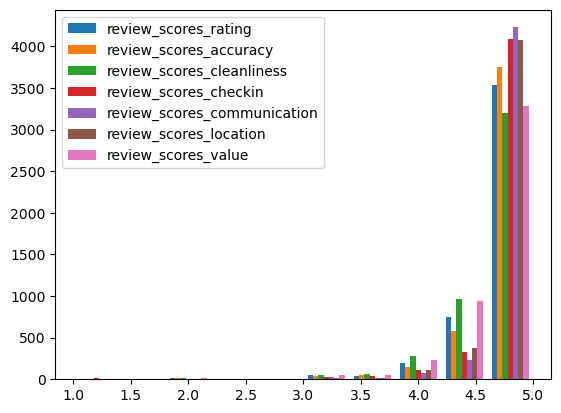

In [22]:
# plot histograms of review scores
import matplotlib.pyplot as plt
plt.hist(listings[review_columns], label=review_columns, bins=10)
plt.legend();

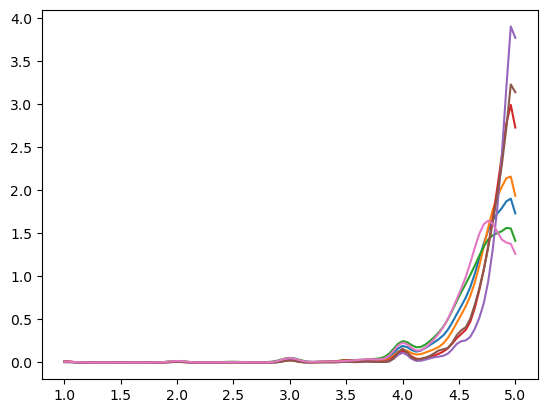

In [23]:
# The code performs Kernel Density Estimation on non-NaN values of specified columns 
# and plots the results.
import scipy.stats as stats
import numpy as np

# Generate 101 evenly spaced numbers between 1 and 5
x = np.linspace(1, 5, 101)

# Iterate over each column in review_columns
for k in review_columns:
    # Perform Kernel Density Estimation (KDE) on the non-NaN values of the column
    y = stats.gaussian_kde(listings[k].dropna())
    
    # Plot the KDE result against the x values, labeling the plot with the column name
    plt.plot(x, y(x), label=k)

In [24]:
coordinate_columns = ['latitude', 'longitude']
price_columns = ['price' ]
# check the statistics of coordinate columns and price columns
print(listings[coordinate_columns+price_columns].describe())
# the price statistics is not showing, why?


latitude    longitude
count  5610.000000  5610.000000
mean     25.044914   121.530097
std       0.018386     0.024151
min      24.983430   121.464840
25%      25.035930   121.507765
50%      25.043820   121.524600
75%      25.049639   121.546803
max      25.152680   121.621450

In [25]:
# Check the price column
print(listings['price'].head())
# it seemns the price column is not a number, because it contains dollar sign and comma
# we need to clean it up
listings['price'] = (
    listings['price']
        .str
        .replace(r'[\$,]', '', regex=True)
        .astype(float))
print(listings['price'].head())

0          NaN
1        $5.00
2          NaN
3    $1,552.00
4    $3,688.00
Name: price, dtype: object

0       NaN
1       5.0
2       NaN
3    1552.0
4    3688.0
Name: price, dtype: float64

In [26]:
# now we can see the statistics of price column
print(listings['price'].describe())

count      5190.000000
mean       3063.493834
std       13966.489122
min           4.000000
25%        1250.000000
50%        1946.500000
75%        3199.000000
max      800000.000000
Name: price, dtype: float64

In [27]:
from IPython.display import display
# Set columns to display
info_columns = ['name', 'price', 'neighbourhood', 'room_type', 'property_type', 'accommodates', 'review_scores_rating']
# See the most expensive listings
most_expensive_listings = listings.nlargest(10, 'price')
display(
    most_expensive_listings[info_columns]
)
# See the cheapest listings
cheapest_listings = listings.nsmallest(10, 'price')
display(
    cheapest_listings[info_columns]
)
# it seems that the price is not reasonable, the ceapest price is too low, and the most expensive price is a bit too high.

,name,price,neighbourhood,room_type,property_type,accommodates,review_scores_rating
2026,Taipei NTU Green Room 2F-1,800000.0,NaN,Private room,Private room in rental unit,1,NaN
1113,市府捷運站Metro TaipeiCityHall Bunk bed,325510.0,"Xinyi District, Taipei, Taiwan",Private room,Private room in rental unit,2,NaN
272,Test Loft,279000.0,NaN,Shared room,Shared room in rental unit,2,NaN
4840,One night with 書道,250000.0,NaN,Shared room,Shared room in home,1,NaN
1193,市府捷運站Metro Taipei CityHall bunk bed,233019.0,"信義區 Xinyi District, Taipei, Taiwan",Private room,Private room in rental unit,2,5.00
450,Nǐ hǎo//台北西門町Ximen Mrt《Free wifi egg》2-3人/新房限時優惠中,140000.0,"台北市, Taiwan",Entire home/apt,Entire loft,3,4.91
527,Taipei NTNU Female Yellow Room 4F-1,100000.0,"Da’an District, Taipei, Taiwan",Private room,Private room in rental unit,1,5.00
5373,阿我這測試用的,90000.0,NaN,Shared room,Shared room in guesthouse,1,NaN
2434,Heart of Redhouse Ximen,80000.0,NaN,Entire home/apt,Entire rental unit,3,NaN
4855,Relaxing home,65000.0,NaN,Entire home/apt,Entire rental unit,4,NaN


,name,price,neighbourhood,room_type,property_type,accommodates,review_scores_rating
3304,Tpe 101 Room H @ Taipei 101 MRT,4.0,NaN,Private room,Private room in rental unit,1,4.00
3926,Tpe 101 Room B @ Taipei 101 MRT,4.0,NaN,Private room,Private room in rental unit,1,5.00
4317,Room 3C @ LiuZhangLi MRT (3 min),4.0,NaN,Private room,Private room in rental unit,1,2.67
1,Cozy Room D @ Linguang MRT 2 mins,5.0,NaN,Private room,Private room in rental unit,2,NaN
2708,Room 3B @ LiuZhangLi MRT(3 min),5.0,NaN,Private room,Private room in rental unit,1,5.00
3382,Simple Room @ Longshan MRT - Room E,5.0,NaN,Private room,Private room in rental unit,1,4.00
4852,Great Room B @ ZhongShan MRT (9 min walk),5.0,NaN,Private room,Private room in rental unit,1,5.00
4862,Great Room C @ ZhongShan MRT (9 min walk),5.0,NaN,Private room,Private room in rental unit,2,4.00
4913,Simple Room @ Longshan MRT - Room D,5.0,NaN,Private room,Private room in rental unit,1,5.00
5024,華西街夜市旁的溫馨套房 C,5.0,NaN,Private room,Private room in rental unit,1,5.00


In [28]:
# The assumption regarding the excessively low price is that these figures appear to be review rates 
# incorrectly placed in the price column.  
# To verify the assumption, we can check that whether there are price values between 10 and 100
listings.query('price > 10 and price < 100')[info_columns ]
# there are still a few listings with price between 10 and 100, so there are other reasons for the too low price
# In further analysis, we should omit price values that are too low or too high

,name,price,neighbourhood,room_type,property_type,accommodates,review_scores_rating
97,Tpe main station (4 mins walk) Room A,75.0,NaN,Private room,Private room in rental unit,1,NaN
1009,Tpe 101 Room D @ Taipei 101 MRT,81.0,NaN,Private room,Private room in rental unit,1,NaN
4936,Taipei 101 MRT (5 min) Room C,91.0,NaN,Private room,Private room in rental unit,2,3.0
5393,Tpe main station (4 mins walk) Room B,91.0,NaN,Private room,Private room in rental unit,2,5.0


In [29]:
# check statistics of price by differnt root_type and property_type
# and should omit price greater than 30000 and less than 300 
# to get more reasonable statistics
statistics = (listings
              .query('price > 300 and price < 30000')
              .groupby(['room_type', 'property_type'])['price']
              .describe())
# list only types with more than 30 listings and sort by mean price
statistics[statistics['count'] > 30].sort_values('mean')

count         mean  \
room_type       property_type                                            
Shared room     Shared room in rental unit          139.0   864.755396   
Private room    Private room in condo               105.0  1349.276190   
Shared room     Shared room in hostel                43.0  1368.418605   
Private room    Private room in rental unit         777.0  1388.602317   
                Private room in home                 77.0  1682.779221   
                Room in hotel                        58.0  2452.775862   
Entire home/apt Entire loft                         155.0  2520.845161   
Private room    Private room in bed and breakfast    34.0  2735.205882   
Entire home/apt Entire rental unit                 2542.0  2843.066090   
                Entire condo                        556.0  3321.715827   
                Minsu                                54.0  3437.314815   
                Entire home                         256.0  3889.589844   

                                                           std     min  \
room_type       property_type                                            
Shared room     Shared room in rental unit         1963.931689   306.0   
Private room    Private room in condo               792.552055   380.0   
Shared room     Shared room in hostel              1890.736796   379.0   
Private room    Private room in rental unit        1571.170834   350.0   
                Private room in home               1478.903680   330.0   
                Room in hotel                      1186.396372  1066.0   
Entire home/apt Entire loft                        1228.970862  1000.0   
Private room    Private room in bed and breakfast  1533.093877   714.0   
Entire home/apt Entire rental unit                 2096.521081   308.0   
                Entire condo                       2150.087374   599.0   
                Minsu                              2533.033142   890.0   
                Entire home                        3166.960283   800.0   

                                                       25%     50%      75%  \
room_type       property_type                                                 
Shared room     Shared room in rental unit          349.00   460.0   679.00   
Private room    Private room in condo               850.00  1100.0  1500.00   
Shared room     Shared room in hostel               568.00   568.0   793.50   
Private room    Private room in rental unit         712.00  1026.0  1500.00   
                Private room in home                780.00  1279.0  1954.00   
                Room in hotel                      1609.50  2319.0  2794.00   
Entire home/apt Entire loft                        1711.00  2246.0  2992.50   
Private room    Private room in bed and breakfast  1497.00  2788.0  3836.50   
Entire home/apt Entire rental unit                 1530.75  2223.0  3411.25   
                Entire condo                       1861.50  2730.0  4073.75   
                Minsu                              1900.00  3010.5  3945.75   
                Entire home                        2009.00  3263.5  4166.00   

                                                       max  
room_type       property_type                               
Shared room     Shared room in rental unit         19829.0  
Private room    Private room in condo               4557.0  
Shared room     Shared room in hostel               8343.0  
Private room    Private room in rental unit        19000.0  
                Private room in home               11143.0  
                Room in hotel                       6707.0  
Entire home/apt Entire loft                         8671.0  
Private room    Private room in bed and breakfast   6510.0  
Entire home/apt Entire rental unit                 22247.0  
                Entire condo                       14714.0  
                Minsu                              16286.0  
                Entire home                        21832.0

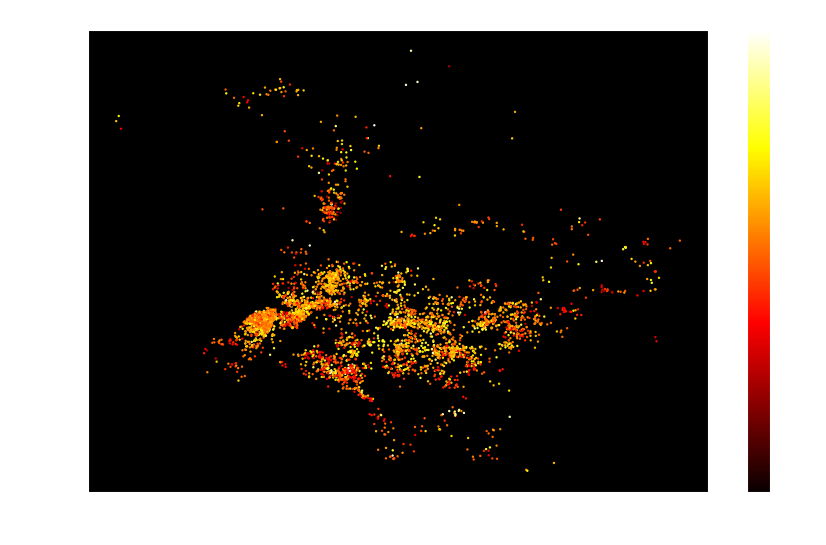

In [30]:
import matplotlib.pyplot as plt

# Filter out listings with improper or NaN prices
filtered_listings = listings.dropna(subset=['price'])
# filter out listings with price less than 10 or greater than 30000
filtered_listings = filtered_listings.query('price > 10 and price < 30000')

# Create scatter plot
plt.figure(figsize=(10, 6))
# set the background color to black
plt.style.use('dark_background')
scatter = plt.scatter(
    filtered_listings['longitude'], 
    filtered_listings['latitude'], 
    c=np.log(filtered_listings['price']), 
    cmap='hot', 
    alpha=1,
    s=0.5
    )
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listings by Coordinates Colored by Price')
plt.show()

In [31]:
import plotly.express as px

# Filter out listings with improper or NaN prices
filtered_listings = listings.dropna(subset=['price'])
# filter out listings with price less than 10 or greater than 30000
filtered_listings = filtered_listings.query('price > 10 and price < 30000')

# Create scatter plot with Plotly
# choose a better cmap for scatter plot for street map background
cmap = px.colors.sequential.Agsunset
fig = px.scatter_mapbox(
    filtered_listings,
    lat='latitude',
    lon='longitude',
    # using name field as hover data
    hover_name='name',
    color=np.log(filtered_listings['price']),
    color_continuous_scale=cmap,
    size_max=15,
    zoom=10,
    mapbox_style='open-street-map',
    title='Listings by Coordinates Colored by Price'
)
# change size of the figure
fig.update_layout(width=800, height=800)
fig.show()

In [32]:
import plotly.express as px
import numpy as np
# Filter out listings with improper or NaN prices
filtered_listings = listings.dropna(subset=['price'])
# filter out listings with price less than 10 or greater than 30000
filtered_listings = filtered_listings.query('price > 10 and price < 30000')

# Create KDE density plot with Plotly
fig = px.density_mapbox(
    filtered_listings, 
    lat='latitude', 
    lon='longitude', 
    # using log of price as z value
    z=np.log(filtered_listings['price']),
    # using price and name as hover data
    hover_data={'price': True, 'name': True},
    radius=15, 
    color_continuous_scale=cmap,
    center=dict(lat=filtered_listings['latitude'].mean(), lon=filtered_listings['longitude'].mean()), 
    zoom=13, 
    opacity=0.8,
    mapbox_style='open-street-map',
    title='KDE Density of Listings by Coordinates'
)
# change fig size
fig.update_layout(width=800, height=600)
fig.show()

In [33]:
calendar = pd.read_csv(data_root / 'calendar.csv')
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,68398,2024-06-30,f,$34.00,NaN,30,365
1,68398,2024-07-01,f,$34.00,NaN,30,365
2,68398,2024-07-02,f,$34.00,NaN,30,365
3,68398,2024-07-03,f,$34.00,NaN,30,365
4,68398,2024-07-04,f,$34.00,NaN,30,365
5,68398,2024-07-05,f,$34.00,NaN,30,365
6,68398,2024-07-06,f,$34.00,NaN,30,365
7,68398,2024-07-07,f,$34.00,NaN,30,365
8,68398,2024-07-08,f,$34.00,NaN,30,365
9,68398,2024-07-09,f,$34.00,NaN,30,365


In [34]:
print(calendar.dtypes)
print(calendar.shape)

listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

(2047650, 7)

In [35]:
# Fix the price column in the calendar dataframe
calendar['price'] = calendar['price'].str.replace(r'[\$,]', '', regex=True).astype(float)
print(calendar['price'].head())


0    34.0
1    34.0
2    34.0
3    34.0
4    34.0
Name: price, dtype: float64

In [36]:
# In the following code, we want to merge the calendar and listings dataframes on the listing_id column.
# Rename the price column in listings to listing_price
listings.rename(columns={'price': 'listing_price'}, inplace=True)

# Join the listings to calendar on listing_id
calendar_with_listings = calendar.merge(
    listings[['id', 'name', 'listing_price']], 
    left_on='listing_id', 
    right_on='id', 
    how='left')

# Drop the redundant 'id' column from the merged dataframe
calendar_with_listings.drop(columns=['id'], inplace=True)

# Display the first few rows of the merged dataframe
calendar_with_listings.head(30)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,name,listing_price
0,68398,2024-06-30,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
1,68398,2024-07-01,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
2,68398,2024-07-02,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
3,68398,2024-07-03,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
4,68398,2024-07-04,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
5,68398,2024-07-05,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
6,68398,2024-07-06,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
7,68398,2024-07-07,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
8,68398,2024-07-08,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0
9,68398,2024-07-09,f,34.0,NaN,30,365,Tonghua Studio C near MRT & Taipei 101,1107.0


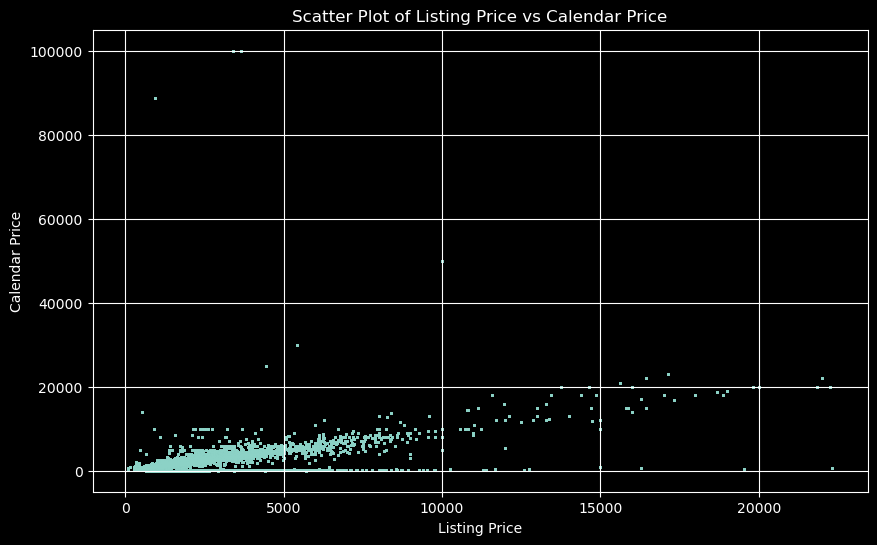

In [37]:
import matplotlib.pyplot as plt

# Filter out listings with improper or NaN prices
filtered_calendar_with_listings = calendar_with_listings.dropna(subset=['listing_price', 'price'])
# Filter out listings with listing_price less than 10 or greater than 30000
filtered_calendar_with_listings = filtered_calendar_with_listings.query('listing_price > 10 and listing_price < 30000')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_calendar_with_listings['listing_price'], filtered_calendar_with_listings['price'], alpha=0.5, s=1)
plt.xlabel('Listing Price')
plt.ylabel('Calendar Price')
plt.title('Scatter Plot of Listing Price vs Calendar Price')
plt.grid(True)
plt.show()

In [38]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,2.047650e+06,2.047650e+06,0.0,2.047650e+06,2.047650e+06
mean,6.200057e+17,2.788696e+03,NaN,1.078373e+01,5.422673e+02
std,4.871845e+17,1.487890e+04,NaN,2.851583e+01,4.148187e+02
min,6.839800e+04,2.000000e+01,NaN,1.000000e+00,1.000000e+00
25%,3.516887e+07,8.500000e+02,NaN,2.000000e+00,3.650000e+02
50%,8.593599e+17,1.780000e+03,NaN,3.000000e+00,3.650000e+02
75%,1.048779e+18,3.000000e+03,NaN,7.000000e+00,1.125000e+03
max,1.189648e+18,1.000000e+06,NaN,3.650000e+02,1.000000e+04


In [39]:
# Convert the 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the year and month from the 'date' column
calendar['year_month'] = calendar['date'].dt.to_period('M')

# Group by 'listing_id' and 'year_month' and calculate the average price
average_price_by_month = (
    calendar
    .groupby(['listing_id', 'year_month'])['price']
    .mean().reset_index())
# Display the result
average_price_by_month.head(50)

,listing_id,year_month,price
0,68398,2024-06,34.0
1,68398,2024-07,34.0
2,68398,2024-08,34.0
3,68398,2024-09,34.0
4,68398,2024-10,34.0
5,68398,2024-11,34.0
6,68398,2024-12,34.0
7,68398,2025-01,34.0
8,68398,2025-02,34.0
9,68398,2025-03,34.0


In [40]:
# Group by listing_id and calculate the standard deviation of the price
price_variability = (
    average_price_by_month
    .groupby('listing_id')['price']
    .std().reset_index())

# Filter out listings where the standard deviation of the price is greater than zero
variable_price_listings = price_variability[price_variability['price'] > 0]

# Display the listings with variable prices
variable_price_listings

,listing_id,price


In [41]:
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
year_month             period[M]
dtype: object

In [42]:
calendar['available']

0          f
1          f
2          f
3          f
4          f
          ..
2047645    t
2047646    t
2047647    t
2047648    t
2047649    t
Name: available, Length: 2047650, dtype: object

In [43]:
# Assert that the 'available' column contains only 't' or 'f'
assert calendar['available'].isin(['t', 'f']).all(), "The 'available' column contains values other than 't' or 'f'"

# Print the value counts of the 'available' column
print(calendar['available'].value_counts())

# Change the dtype of 'available' to boolean
calendar['available'] = calendar['available'] == 't'
print(calendar['available'].head())

available
f    1120282
t     927368
Name: count, dtype: int64

0    False
1    False
2    False
3    False
4    False
Name: available, dtype: bool

In [54]:
import time
# Calculate the ratio of dates that are not available each month for every listing ID
start_time = time.time()
availability_ratio = (
    calendar
    .groupby(['listing_id', 'year_month'])['available']
    .apply(lambda x: (x == False).mean())
    .reset_index(name='not_available_ratio')
)
end_time = time.time()
print(f"Time taken for method 1: {end_time - start_time} seconds")

# Alternative way to calculate the ratio of dates that are not available each month for every listing ID
start_time = time.time()
availability_ratio = (1-
    calendar
    .groupby(['listing_id', 'year_month'])['available']
    .mean()
).reset_index(name='not_available_ratio')
#availability_ratio['not_available_ratio'] = 1 - availability_ratio['not_available_ratio']
end_time = time.time()
print(f"Time taken for method 2: {end_time - start_time} seconds")

# Display the result
display(availability_ratio.iloc[:13])
display(availability_ratio.iloc[13:26])
display(availability_ratio.iloc[26:39])

Time taken for method 1: 4.161787509918213 seconds

Time taken for method 2: 0.07701754570007324 seconds

,listing_id,year_month,not_available_ratio
0,68398,2024-06,1.000000
1,68398,2024-07,1.000000
2,68398,2024-08,1.000000
3,68398,2024-09,0.533333
4,68398,2024-10,1.000000
5,68398,2024-11,0.233333
6,68398,2024-12,1.000000
7,68398,2025-01,1.000000
8,68398,2025-02,0.000000
9,68398,2025-03,0.000000


,listing_id,year_month,not_available_ratio
13,271733,2024-06,1.000000
14,271733,2024-07,0.548387
15,271733,2024-08,0.741935
16,271733,2024-09,1.000000
17,271733,2024-10,0.451613
18,271733,2024-11,1.000000
19,271733,2024-12,0.870968
20,271733,2025-01,1.000000
21,271733,2025-02,1.000000
22,271733,2025-03,1.000000


,listing_id,year_month,not_available_ratio
26,289296,2024-06,0.000000
27,289296,2024-07,0.645161
28,289296,2024-08,0.000000
29,289296,2024-09,0.000000
30,289296,2024-10,0.000000
31,289296,2024-11,0.000000
32,289296,2024-12,0.000000
33,289296,2025-01,0.000000
34,289296,2025-02,0.000000
35,289296,2025-03,0.000000


In [57]:
# Pivot the table
availability_pivot = availability_ratio.pivot(
    index='listing_id', 
    columns='year_month', 
    values='not_available_ratio'
)

# Display the pivoted table
availability_pivot.head(20)

year_month,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06
listing_id,,,,,,,,,,,,,
68398,1.0,1.000000,1.000000,0.533333,1.000000,0.233333,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
271733,1.0,0.548387,0.741935,1.000000,0.451613,1.000000,0.870968,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
289296,0.0,0.645161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
289298,1.0,0.612903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
333362,0.0,0.903226,1.000000,0.800000,0.096774,0.000000,0.258065,0.096774,0.000000,0.161290,0.000000,0.000000,0.000000
646629,0.0,0.516129,0.612903,0.300000,0.000000,0.166667,0.774194,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
697760,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,0.000000,0.000000,0.000000,0.000000
718493,1.0,0.741935,0.000000,0.000000,0.000000,0.000000,0.419355,0.193548,0.000000,0.000000,0.000000,0.000000,0.000000
761561,1.0,0.903226,1.000000,1.000000,1.000000,1.000000,1.000000,0.612903,0.892857,0.000000,0.000000,0.000000,0.000000


In [58]:
# Replace the listing_id by name in the availability_pivot dataframe
availability_pivot_with_names = (
    availability_pivot
    .rename(index=listings.set_index('id')['name'])
)

# Display the pivoted table with names
availability_pivot_with_names.head(20)

year_month,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06
listing_id,,,,,,,,,,,,,
Tonghua Studio C near MRT & Taipei 101,1.0,1.000000,1.000000,0.533333,1.000000,0.233333,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Taipei Rooftop - Whole apartment!,1.0,0.548387,0.741935,1.000000,0.451613,1.000000,0.870968,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Fabulous studio - Center Taipei-- Monthly only,0.0,0.645161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fabulous Studio in heart of Taipei----Monthly only,1.0,0.612903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"3min walk to MRT, Quiet good sleep",0.0,0.903226,1.000000,0.800000,0.096774,0.000000,0.258065,0.096774,0.000000,0.161290,0.000000,0.000000,0.000000
[Re-Open Special!] Skygarden Central Apartment,0.0,0.516129,0.612903,0.300000,0.000000,0.166667,0.774194,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Tonghua Studio D near MRT & Taipei 101,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,0.000000,0.000000,0.000000,0.000000
"閣樓風情| 無日租｜暖氣空調伺候（此經濟房型需走五層） Y0UTUBE 搜""閣樓風情實景""看影片",1.0,0.741935,0.000000,0.000000,0.000000,0.000000,0.419355,0.193548,0.000000,0.000000,0.000000,0.000000,0.000000
Studio with kitchen near Guting MRT,1.0,0.903226,1.000000,1.000000,1.000000,1.000000,1.000000,0.612903,0.892857,0.000000,0.000000,0.000000,0.000000


In [61]:
# Sort the listings by the average of not_available_ratio in descending order
sorted_availability = availability_pivot_with_names.mean(axis=1).sort_values(ascending=False)

# Display the top 10 listings with the highest average not_available_ratio
print(sorted_availability.head(150).to_dict())

{
    '台北市大安區公寓': 1.0,
    '機捷3分鐘、MRT3mins)Cat Tail Pocket Inn.貓尾口袋(背包客棧BnB)': 1.0,
    '古亭捷運站3號出口 .離師大夜市.台大.公館.西門町都很近': 1.0,
    'DAAN PARK-2 bunk bed private room': 1.0,
    '西門雙層四人房': 1.0,
    '大安公園旅店 - 4人景觀套房': 1.0,
    'DAAN PARK Hotel - 5 Bunk Bed Female Dorm': 1.0,
    '2 Bunk Beds Private Room for Max 4 people': 1.0,
    '大安公園旅店 - 單人房': 1.0,
    '大安公園旅店 - Double bed private room with window': 1.0,
    '[月租]SB獨立套房/士林夜市1分鐘/劍潭站6分鐘': 1.0,
    'DAAN PARK Hotel - 3 bunk bed private room': 1.0,
    'Deluxe classic apartment[305]': 1.0,
    'Deluxe classic apartment[1305]': 1.0,
    '信義商圈 ·台北思泊客精緻酒店Vantage Room': 1.0,
    '「永春站」信義區、全新開幕！全新裝修！現代風格、地鐵步行4分鐘、寬敞3房2衛浴、親子家庭、出差辦公': 1.0,
    'Taipei 101~近市府獨立電梯住家~Near Taipei City Hall Station': 1.0,
    'Convenient spacious apartment in Taipei!': 1.0,
    '日初青旅  Sundaily Hostel': 1.0,
    '大安區完整雙人房｜近科技大樓站｜交通、生活便利': 1.0,
    'MRT Ximen 5 mins 台北車站西門町捷運步行5分鍾 大窗全新裝潢 高品質 私人空間': 1.0,
    'Loft w/ private terrace in Daan - HP Loft': 1.0,
    '西門町清馨5臥房Ximending five-Bedroom': 1.0,
    '9E 獨立房間 共用衛浴 樓梯2樓 寬敞的大房間': 1.0,
    '2-4人房/台北車站6分/西門站9分/2 Lift/Wi-Fi/Disney+': 1.0,
    'room in a shared house next to NTU': 1.0,
    '[Taipei journey608] MRT Zhongshan Station 8min 608': 1.0,
    '西門町精晴雙人房 Ximending Double Room': 1.0,
    'Bright room in quiet townhouse - YP1': 1.0,
    '[Taipei  journey615]MRT Zhongshan Station 8min 615': 1.0,
    '[Taipei journey606] MRT Zhongshan Station 8min 606': 1.0,
    'ITW01 台北車站5分鐘/獨立衛浴/無窗戶/一大床 (Double Bed)': 1.0,
    '華麗的冒險從這裡開始（獨立套房，無需與人共同衛浴）': 1.0,
    'Bright room in quiet townhouse - YP2': 1.0,
    'MRT Daan Station walk to Taipei 101': 1.0,
    'Your cozy stay at Taipei - metro Teipei 101 EXIT 2': 1.0,
    '上鋪單人房 Single room shared shower room no window': 1.0,
    '大安藝術公寓 大安站走路一分鐘': 1.0,
    'T02 台北車站5分鐘/獨立衛浴/無窗戶/兩小床 (Twin Bed)': 1.0,
    '[Taipei journey603] MRT Zhongshan Station 8min 603': 1.0,
    '[Taipei  journey613] MRT Zhongshan station Studio': 1.0,
    '國父紀念館&忠孝敦化｜東區&近信義區｜背包床位｜有拉簾｜獨立廁所｜couchSurfing': 1.0,
    '[Taipei journey610] MRT Zhongshan station Studio': 1.0,
    'Ximen MRT 四人房': 1.0,
    'Pet-Friendly Cozy Apartment Near Dahu Park': 1.0,
    "Chic 2Bedroom near Da'an MRT": 1.0,
    'Classic Loft2 next to Taipei 101': 1.0,
    '西門町捷運口步行10分鐘': 1.0,
    '月租優惠&5星裝修@台北101 Apt@國際會議中心@世貿中心@北醫@四四南村@吳興商圈，時尚小豪宅': 1.0,
    'Family apartment, Elevator building, near 2 MRTs,': 1.0,
    'Closed to 101 shopping area': 1.0,
    '台北松山・無敵河景・舒適客廳、超好睡大床': 1.0,
    'TP03 台北車站5分鐘/獨立衛浴/無窗戶/三小床 (3 Single Beds)': 1.0,
    '城市樹屋｜捷運市政府站2分鐘｜木質挑高Loft空間': 1.0,
    'Ximending residential communities, new equipment': 1.0,
    'Ximending, quiet, newly refurbished': 1.0,
    'Deluxe apartment/view/kitchen/bathtub': 1.0,
    'MRT Daan Station 4 mins by walk near Taipei 101': 1.0,
    '新北投捷運站/溫泉商圈/電梯套房': 1.0,
    '#Urtrip Hotel MRT南京復興站，近松山機場，微風廣場、小巨蛋都能步行抵達 #豪華四人房': 1.0,
    '#Urtrip Hotel MRT南京復興站，近松山機場，微風廣場、小巨蛋都能步行抵達 #豪華三人房': 1.0,
    '#Urtrip Hotel MRT南京復興站，近松山機場，微風廣場、小巨蛋都能步行抵達 #經典雙床房(無窗)': 1.0,
    '西門町2間獨立相鄰套房,2間專屬衛浴,捷運步行5分鐘,24h保安,2~7人': 1.0,
    '台北大安區近捷運溫馨大三房': 1.0,
    '優惠 臺北 4人房 Taipei main station 白色空間': 1.0,
    '[Taipei journey602] MRT Zhongshan Station 8min 602': 1.0,
    '小米家-京站15': 1.0,
    'Airport MRT Ximending  3-room Retro Sunny house': 1.0,
    'Studio Apartment 22 with big windows.': 1.0,
    'Bright Studio2 corner condo with big windows': 1.0,
    'DAAN PARK Hotel - Double bed private room': 1.0,
    '走路7分鐘到北門捷運站迪化街5分鐘，摩登電梯大套房': 1.0,
    'TP04 台北車站5分鐘/獨立衛浴/無窗戶/三小床 (3 Single Beds)': 1.0,
    'MRT Ximen 5 mins 近台大北科東吳，台北車站西門町捷運步行大窗裝潢新 一層一戶 高品質': 1.0,
    '安捷羅馬假期會館-酒店式長租公寓雅緻標準套房Standard Suite': 1.0,
    'Relaxed Loft2 with kitchen and laundry': 1.0,
    '優惠 臺北 2人房 Taipei main station 白色空間': 1.0,
    'Studio Apartment2 with city Views': 1.0,
    '[Taipei journey616]MRT Zhongshan Station 8min': 1.0,
    'NEW [Taipei journey517] 8Min MRT Zhongshan Station': 1.0,
    '[Taipei journey508] MRT Zhongshan Station 8min 508': 1.0,
    '[a] 年租/月租/西門捷運3分鐘，洗衣機高速連網全功能套房。適升學考

In [ ]:

# Calculate the average not_available_ratio for each listing_id
average_not_available_ratio = availability_ratio.groupby('listing_id')['not_available_ratio'].mean()

# Calculate the quantiles for each 10%
quantiles = average_not_available_ratio.quantile(np.linspace(0, 1, 51))

# Display the quantiles by constructing a dataframe and show both the quantiles and raito in percentage using the dataframe display format
quantiles_df = pd.DataFrame(quantiles, columns=['not_available_ratio'])
quantiles_df['not_available_ratio'] = quantiles_df['not_available_ratio'].map(lambda x: f'{x:.2%}')
quantiles_df.index = quantiles_df.index.map(lambda x: f'{x:.0%}')
quantiles_df.index.name = 'Quantile'
quantiles_df


In [ ]:
# Calculate the average not_available_ratio for each listing_id
average_not_available_ratio = availability_ratio.groupby('listing_id')['not_available_ratio'].mean()

# Calculate the quantiles for each 10%
quantiles = average_not_available_ratio.quantile(np.linspace(0, 1, 51))

# Display the quantiles by constructing a dataframe and show both the quantiles and raito in percentage using the dataframe display format
quantiles_df = pd.DataFrame(quantiles, columns=['not_available_ratio'])
quantiles_df['not_available_ratio'] = quantiles_df['not_available_ratio'].map(lambda x: f'{x:.2%}')
quantiles_df.index = quantiles_df.index.map(lambda x: f'{x:.0%}')
quantiles_df.index.name = 'Quantile'
quantiles_df


,not_available_ratio
Quantile,
0%,0.00%
2%,0.00%
4%,0.74%
6%,7.94%
8%,11.42%
10%,15.38%
12%,20.27%
14%,24.07%
16%,24.33%


In [173]:
# Calculate the average not_available_ratio for each listing_id
average_not_available_ratio = availability_ratio.groupby('listing_id')['not_available_ratio'].mean()

# Calculate the quantiles for each 10%
quantiles = average_not_available_ratio.quantile(np.linspace(0, 1, 51))

# Display the quantiles by constructing a dataframe and show both the quantiles and raito in percentage using the dataframe display format
quantiles_df = pd.DataFrame(quantiles, columns=['not_available_ratio'])
quantiles_df['not_available_ratio'] = quantiles_df['not_available_ratio'].map(lambda x: f'{x:.2%}')
quantiles_df.index = quantiles_df.index.map(lambda x: f'{x:.0%}')
quantiles_df.index.name = 'Quantile'
quantiles_df


,not_available_ratio
Quantile,
0%,0.00%
2%,0.00%
4%,0.74%
6%,7.94%
8%,11.42%
10%,15.38%
12%,20.27%
14%,24.07%
16%,24.33%


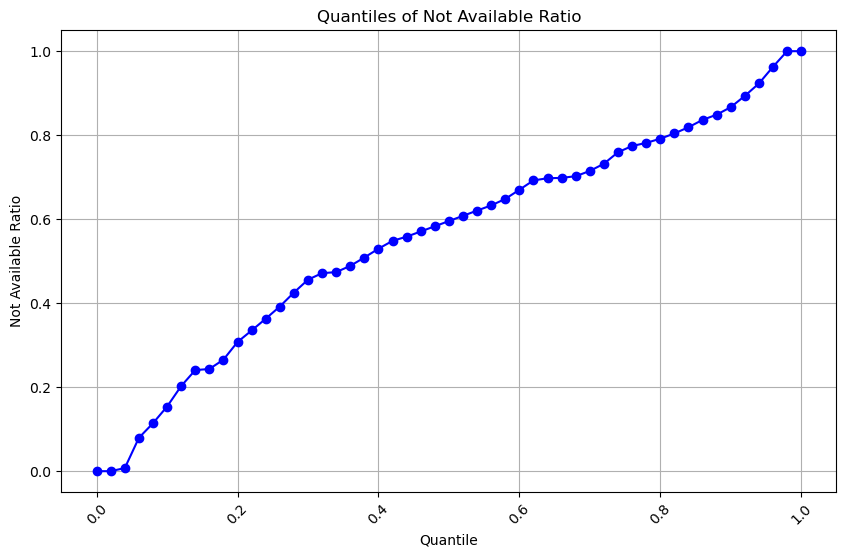

In [178]:
import matplotlib.pyplot as plt

# Reset to default style (white background)
plt.style.use('seaborn-whitegrid')

# Plot the quantiles
plt.figure(figsize=(12, 8))
plt.plot(quantiles.index, quantiles.values, marker='o', linestyle='-', color='b')
plt.xlabel('Quantile', fontsize=14)
plt.ylabel('Not Available Ratio', fontsize=14)
plt.title('Quantiles of Not Available Ratio', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()